In [1]:
import pandas as pd
import stats as st
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

names = ['COUGH', 'DRINK', 'EAT', 'READ', 'SIT', 'WALK']
col_names = ['timestamp', 'X', 'Y', 'Z']

def sliding_window(df_list: list[pd.DataFrame], window_size, offset, output_file):
    window_df = pd.DataFrame(columns=['time_past', 'mean_X', 'mean_Y', 'mean_Z', 'mean_distance', 'target'])
    for i in range(0, len(df_list)):
        rows, columns = df_list[i].shape
        for j in range(0, rows-window_size+1, offset):
            window = df_list[i].iloc[j:j+window_size]
            new_row_df = pd.DataFrame([[window['timestamp'].to_numpy()[-1]-window['timestamp'].to_numpy()[0], window['X'].mean(), window['Y'].mean(), window['Z'].mean(), window['distance'].mean(), window['target'].to_numpy()[0]]], columns=window_df.columns)
            window_df = pd.concat([window_df, new_row_df], ignore_index=True)
    return window_df
            
            

def distance(df: pd.DataFrame):
    return math.sqrt(float(df['X'])**2+float(df['Y'])**2 + float(df['Z'])**2)
    

frame_list = [pd.read_csv(name+'.csv') for name in names]


for i in range(0, len(frame_list)):
    frame_list[i] = frame_list[i].iloc[1:, :]
    frame_list[i].reset_index(drop=True, inplace=True)
    frame_list[i].columns = col_names
    frame_list[i]['distance'] = frame_list[i].apply(distance, axis=1)
    frame_list[i]['target'] = len(frame_list[i])*[i]
    frame_list[i] = frame_list[i].astype(float)




In [ ]:
for i in range(100, 1024, 100):
    window_df = sliding_window(frame_list, i, 16, "test.csv")

    X = window_df.iloc[:, :-1]
    y = window_df['target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, y)
    print("Accuracy Score for the ",i ,"-th sliding window size")
    print(knn.score(X, y))



In [2]:
window_df = sliding_window(frame_list, 800, 16, "test.csv")

X = window_df.iloc[:, :-1]
y = window_df['target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(knn.score(X, y))

/tmp/ipykernel_5044/2607097942.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  window_df = pd.concat([window_df, new_row_df], ignore_index=True)


1.0


In [3]:
from sklearn.preprocessing import normalize
normalize(X, norm="l1") 

array([[ 9.97131841e-01, -1.26130003e-03,  1.55212270e-04,
         1.67814823e-04,  1.28383231e-03],
       [ 9.97130006e-01, -1.26220675e-03,  1.55845547e-04,
         1.67225058e-04,  1.28471668e-03],
       [ 9.97135345e-01, -1.26149444e-03,  1.55408421e-04,
         1.64177411e-04,  1.28357427e-03],
       ...,
       [ 9.97226528e-01, -1.27876510e-03, -6.04783813e-05,
         1.16882855e-04,  1.31734569e-03],
       [ 9.97232253e-01, -1.27845987e-03, -5.93276174e-05,
         1.13731471e-04,  1.31622809e-03],
       [ 9.97244411e-01, -1.27742109e-03, -6.48491944e-05,
         9.87360740e-05,  1.31458278e-03]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

pca.get_covariance()

def PCA_find(X):
    for i in range(1, 6):
        pca = PCA(n_components = i)
        X_new = pca.fit_transform(X)
        cumulative_variance = sum(pca.explained_variance_ratio_)
        if cumulative_variance >= 0.85:
            return i
        
print(PCA_find(X))

X_train, X_test , y_train, y_test = train_test_split(X.iloc[:, 1:2], y, test_size = 0.4, random_state = 0)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
 
cm = confusion_matrix(y_test,y_pred)
print(cm)

1
0.6642043056141832
[[   2    3    0    0    0   50]
 [   2  108   13   14    0   98]
 [   0   24  830  359   76   14]
 [   0   24  339  602  171   82]
 [   0    0   47  141  489    0]
 [  13   64   22   35    0 1116]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)


In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
 
cm = confusion_matrix(y_test,y_pred)
print(cm)
 

1.0
[[  55    0    0    0    0    0]
 [   0  235    0    0    0    0]
 [   0    0 1303    0    0    0]
 [   0    0    0 1218    0    0]
 [   0    0    0    0  677    0]
 [   0    0    0    0    0 1250]]


In [23]:
from sklearn.model_selection import cross_val_score


k = 10
kf = KFold(n_splits=k, random_state=None)
# DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(knn, X_train, y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9995778609773975


[[ 102    0    0    0    0    0]
 [   0  342    0    0    0    0]
 [   0    0 1983    0    0    0]
 [   0    0    0 1859    0    0]
 [   0    0    0    0  977    0]
 [   0    0    0    0    0 1843]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00       342
         2.0       1.00      1.00      1.00      1983
         3.0       1.00      1.00      1.00      1859
         4.0       1.00      1.00      1.00       977
         5.0       1.00      1.00      1.00      1843

    accuracy                           1.00      7106
   macro avg       1.00      1.00      1.00      7106
weighted avg       1.00      1.00      1.00      7106



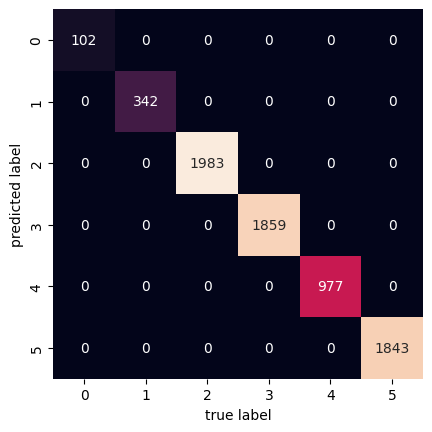

In [8]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
DT = DecisionTreeClassifier()
tree = DT.fit(X_train, y_train)
y_pred = DT.predict(X_train)

conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)
print(classification_report(y_train, y_pred))
DT.score(X_train, y_train)

DT.score(X_train, y_train)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score


k = 10
kf = KFold(n_splits=k, random_state=None)
# DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(DT, X_train, y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9994372140013075


In [14]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
# do the regression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
predict = model.predict(X_test)

# get the needed data
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))

print("The performance for testing set")
print("-------------------------------")
print('MAE is ', mae)
print('MSE is ', mse)
print('RMSE is ',rmse)

0.4092319937834138
The performance for testing set
-------------------------------
MAE is  0.803960158351559
MSE is  1.0088439882046218
RMSE is  1.0044122600827918


In [12]:
from sklearn.model_selection import cross_val_score


k = 10
kf = KFold(n_splits=k, random_state=None)
# DT = DecisionTreeClassifier(criterion='entropy')
 
result = cross_val_score(model, X_train, y_train, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.40270244236596736
